# Competitive Analysis On Rental Pricing 

In [62]:
import numpy as np
import pandas as pd
import pandas_profiling as pd_prof
from decimal import Decimal

data = pd.read_csv("C:\\Users\\Yat\\Documents\\MSDS\\MSDS 7331\\ML_Lab_Data\\listings.csv")

C:\Users\Yat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20190806030549,2019-08-07,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.39
1,3647,https://www.airbnb.com/rooms/3647,20190806030549,2019-08-06,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
2,3831,https://www.airbnb.com/rooms/3831,20190806030549,2019-08-06,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.64
3,5022,https://www.airbnb.com/rooms/5022,20190806030549,2019-08-06,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
4,5099,https://www.airbnb.com/rooms/5099,20190806030549,2019-08-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.60


After reiewing the raw dataset, columns contain ID, URLs and text descriptions will be dropped. 

In [63]:
sub=data.drop(['id','listing_url','scrape_id','last_scraped','summary','space','description','experiences_offered'
              , 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
              'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url',
              'host_picture_url', 'country_code', 'country','amenities', 'minimum_minimum_nights',
              'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm', 'availability_30', 'availability_365','availability_90','has_availability',
               'calculated_host_listings_count','calculated_host_listings_count_shared_rooms',
               'is_business_travel_ready','host_about', 'host_acceptance_rate', 'host_total_listings_count',
              'jurisdiction_names','license','monthly_price','square_feet','weekly_price', 'requires_license'], axis=1)

In [34]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48864 entries, 0 to 48863
Data columns (total 74 columns):
name                                            48848 non-null object
host_id                                         48864 non-null int64
host_name                                       48846 non-null object
host_since                                      48846 non-null object
host_location                                   48694 non-null object
host_about                                      30039 non-null object
host_response_time                              32282 non-null object
host_response_rate                              32282 non-null object
host_acceptance_rate                            0 non-null float64
host_is_superhost                               48846 non-null object
host_neighbourhood                              42443 non-null object
host_listings_count                             48846 non-null float64
host_total_listings_count                       48846 

In [64]:
#functions courtesy of Karen
def money_to_decimal(x):
    x = x.replace("$", "").replace(",", "").replace(" ", "")
    return float(x)

def rem_percent(x):
    x=x.replace("%","")
    return float(x)/100
def truncate(n):
    return int(n * 1000) / 1000

In [65]:
#courtesy of Karen
#converts objects with money values into decimal values to become continous attribute
sub.cleaning_fee = sub.cleaning_fee.astype(str)
sub.extra_people = sub.extra_people.astype(str)
sub.security_deposit = sub.security_deposit.astype(str)
sub.price = sub.price.astype(str)
sub.loc[:,'price'] = sub.loc[:,'price'].apply(money_to_decimal)
sub.loc[:,'cleaning_fee'] = sub.loc[:,'cleaning_fee'].apply(money_to_decimal)
sub.loc[:,'extra_people'] = sub.loc[:,'extra_people'].apply(money_to_decimal)
sub.loc[:,'security_deposit'] = sub.loc[:,'security_deposit'].apply(money_to_decimal)

#imputations
sub['price']=sub.price.mask(sub.price == 0,sub.price.median())
sub.cleaning_fee=sub.cleaning_fee.fillna(sub.cleaning_fee.median())
sub.first_review=sub.first_review.fillna('2019-08-01')
sub['first_review'] =  pd.to_datetime(sub['first_review'],
                              format='%Y-%m-%d')
sub.host_response_rate = sub.host_response_rate.astype(str)
sub.loc[:,'host_response_rate'] = sub.loc[:, 'host_response_rate'].apply(rem_percent)
sub.host_response_rate=sub.host_response_rate.fillna(sub.host_response_rate.median())
sub['host_since'] =  pd.to_datetime(sub['host_since'],
                              format='%Y-%m-%d')
sub.last_review=sub.last_review.fillna('2019-08-01')
sub['last_review'] =  pd.to_datetime(sub['last_review'],
                              format='%Y-%m-%d')
sub.review_scores_accuracy=sub.review_scores_accuracy.fillna(truncate(sub.review_scores_accuracy.median()))
sub.review_scores_checkin=sub.review_scores_checkin.fillna(truncate(sub.review_scores_checkin.median()))
sub.review_scores_cleanliness=sub.review_scores_cleanliness.fillna(truncate(sub.review_scores_cleanliness.median()))
sub.review_scores_communication=sub.review_scores_communication.fillna(truncate(sub.review_scores_communication.median()))
sub.review_scores_location=sub.review_scores_location.fillna(truncate(sub.review_scores_location.median()))
sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median()))
sub.review_scores_value=sub.review_scores_value.fillna(truncate(sub.review_scores_value.median()))
sub.reviews_per_month=sub.reviews_per_month.fillna(sub.reviews_per_month.median())
sub.security_deposit=sub.security_deposit.fillna(sub.security_deposit.median())


In [68]:
sub.describe()

,host_id,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
count,4.886400e+04,48864.000000,48846.000000,48864.000000,48864.000000,48864.000000,48808.000000,48837.000000,48822.000000,48864.000000,...,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000
mean,6.943161e+07,0.952957,14.832269,40.728664,-73.951850,2.846206,1.144187,1.173455,1.548073,151.474664,...,94.400786,9.706839,9.442534,9.806176,9.811477,9.666298,9.536080,5.788044,1.538740,1.229748
std,8.058217e+07,0.142002,88.245394,0.054794,0.046440,1.882121,0.431976,0.746215,1.112344,236.576536,...,7.636545,0.760729,0.999833,0.640464,0.651081,0.693712,0.840617,34.006697,6.439867,1.530471
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,1.000000,0.000000,0.000000,0.000000,10.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.010000
25%,8.048590e+06,1.000000,1.000000,40.689797,-73.982952,2.000000,1.000000,1.000000,1.000000,69.000000,...,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.270000
50%,3.168654e+07,1.000000,1.000000,40.722880,-73.955510,2.000000,1.000000,1.000000,1.000000,105.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.710000
75%,1.096553e+08,1.000000,2.000000,40.762970,-73.935628,4.000000,1.000000,1.000000,2.000000,175.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.550000
max,2.830244e+08,1.000000,1465.000000,40.912400,-73.712990,26.000000,15.500000,14.000000,40.000000,10000.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,335.000000,115.000000,66.610000


In [145]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48864 entries, 0 to 48863
Data columns (total 60 columns):
name                                            48848 non-null object
host_id                                         48864 non-null int64
host_name                                       48846 non-null object
host_since                                      48846 non-null datetime64[ns]
host_location                                   48694 non-null object
host_response_time                              32282 non-null object
host_response_rate                              48864 non-null float64
host_is_superhost                               48846 non-null object
host_neighbourhood                              42443 non-null object
host_listings_count                             48846 non-null float64
host_verifications                              48864 non-null object
host_has_profile_pic                            48846 non-null object
host_identity_verified                    

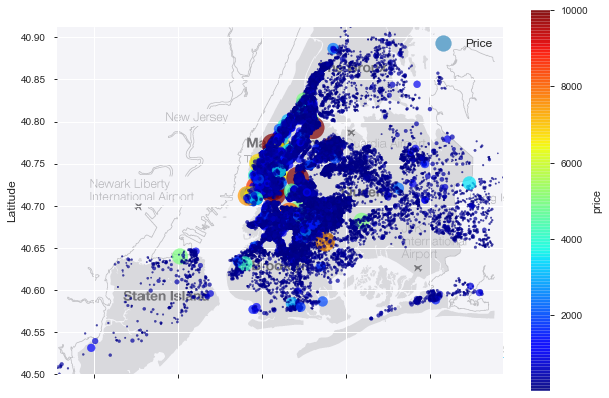

In [91]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline


NYC_img=mpimg.imread("C:\\Users\\Yat\\Documents\\MSDS\\MSDS 7331\\ML_Lab_Data\\nyc-boros.png")
ax = sub.plot(kind="scatter", x="longitude", y="latitude",
    s=sub['price']/20, label="Price",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.7, figsize=(10,7),
)
plt.imshow(NYC_img, extent=[-74.244, -73.713, 40.5, 40.912], alpha=0.5)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Longitude", fontsize=12)

plt.legend(fontsize=12)
plt.show()


###  Projecting Rental Price Onto The NYC Boros Map
In the scatter plot, a high concentration of rentals were from the Manhattan and Brooklyn. Majority of the rental prices were below the $2000 price range. However there are some high rental price ($8000 and above) spots within Manhattan area.
Our preliminary analysis suggest that the highly concentrated rental areas correspond to certain landmarks and mass transit locations such as Time Square or La Guardia Airport

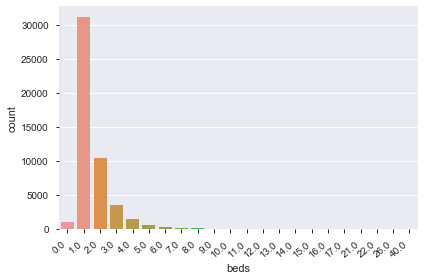

In [113]:
import seaborn as sns
ax=sns.countplot(x="beds", data=sub)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Beds
Most units have between 1 to 2 beds with price ranges from sub $2000 to $10000. 0 bed option was shown in the plot and there could be reason such as these units may have alternative sleeping arrangement and will need to investigate further for explanations. The beds versus price plot is right skewed and there are outliers are identified at beds = 21, 22, 26 and 40.

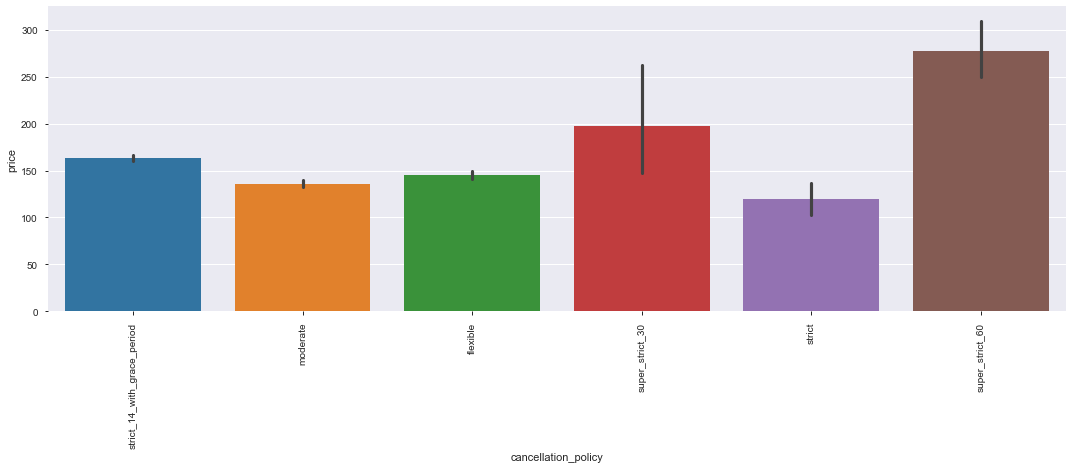

In [155]:
ax=sns.catplot(x="cancellation_policy", y="price", kind="bar", data=sub,height=5, aspect=3)
ax.set_xticklabels(rotation=90)

### Cancellation Policy and Price
Rental Price over $200 usually has a ( super strict 60) 60 days cancellation policy while the $140-$150 units usually have a moderate to flixible cancallation. Units with >$150 to <$200 have a 14 days grace period and at $200, the cencellation policy is 30 days (super strict 20). 
Properties with a $<150 price and strict cancellation policy will need to be further examine to determine if this could be grouped into either the super strict 30 or super strict 60 group.

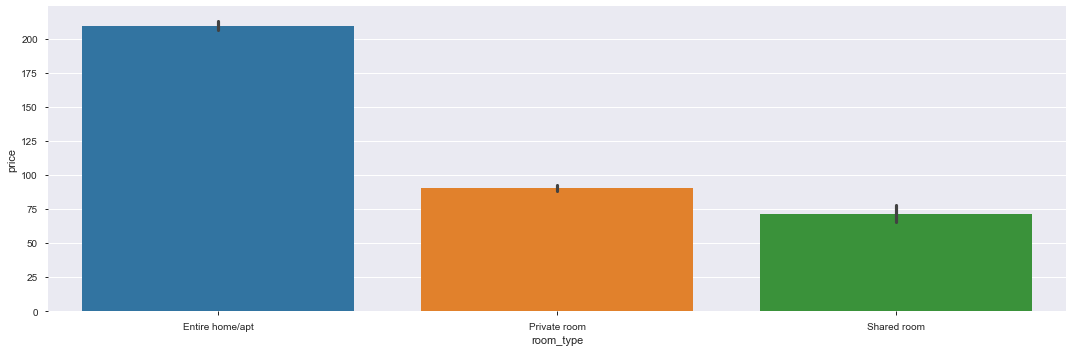

In [156]:
sns.catplot(x="room_type", y="price", kind="bar", data=sub,height=5, aspect=3)



### Room Type
In terms of room type, most prefer the entire home/ apartment option which costs approxmiately $200 ( For reference, standard deviation of price is 236.576536). Follow by private room  at $90 and shared room at $70.

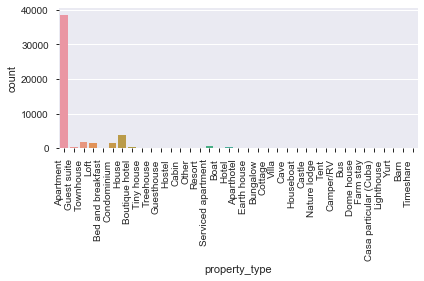

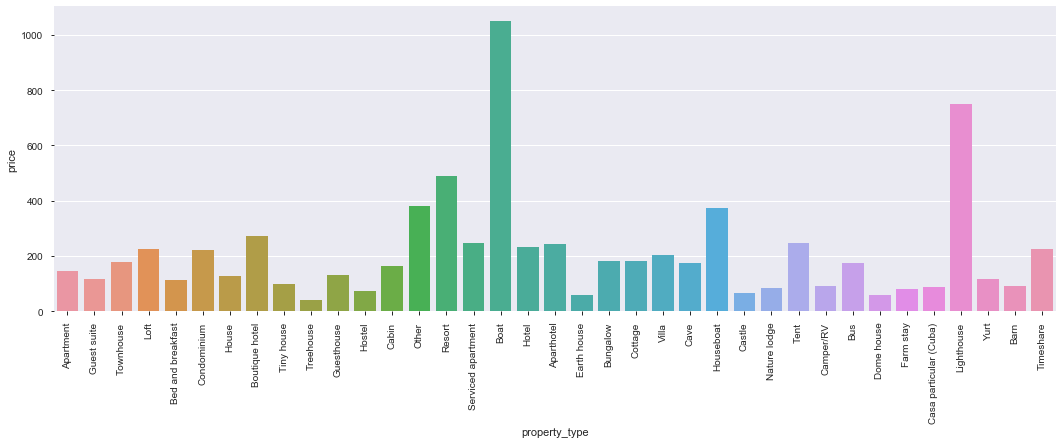

In [157]:
ax=sns.countplot(x="property_type", data=sub)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

ax=sns.catplot(x="property_type", y="price", kind="bar", data=sub, ci=None,height=5, aspect=3)
ax.set_xticklabels(rotation=90)

### Property Type
In the property type by count plot, we see that the most popular and common type is an apartment. In the plot we can also see that boutique hotel is also a common choice for Airbnb renters after apartment.
In the property type versus price, we can see that the rental price variable ranged from the $100s to over $1000. Most of the rental properties were in the sub $500 range however we also see unusual properties such as boat and lighthouses which could cost renters from >$500 to >$1000.

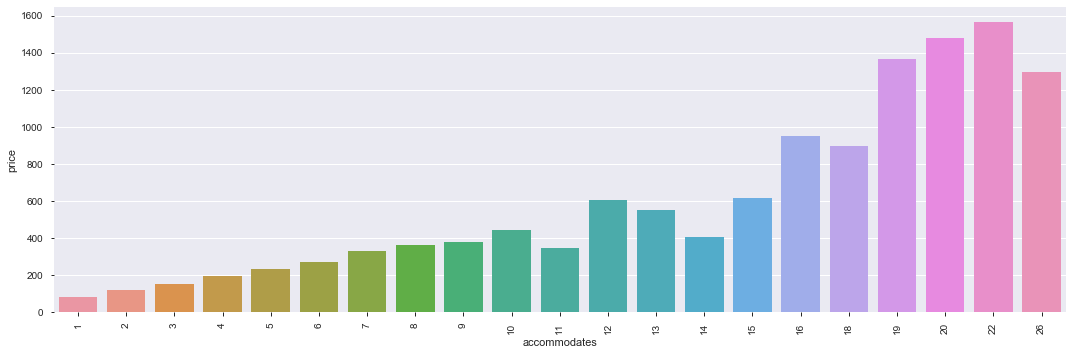

In [158]:
ax=sns.catplot(x="accommodates", y="price", kind="bar", data=sub, ci=None,height=5, aspect=3)
ax.set_xticklabels(rotation=90)

### Accommodates
Properties that can accomodates between 1-4 guests were usually in the >= $200 range. For 5 to 9 guests, the cost is betweem >$200 to $400. In general, the rent price costs more if it can accommodate more guests. There were exceptions where a 11-guest, 14-guest, 18-guest and 26-guest units would cost less than a smaller units (10,13,16,22-guest variants).

<Figure size 1440x1080 with 0 Axes>

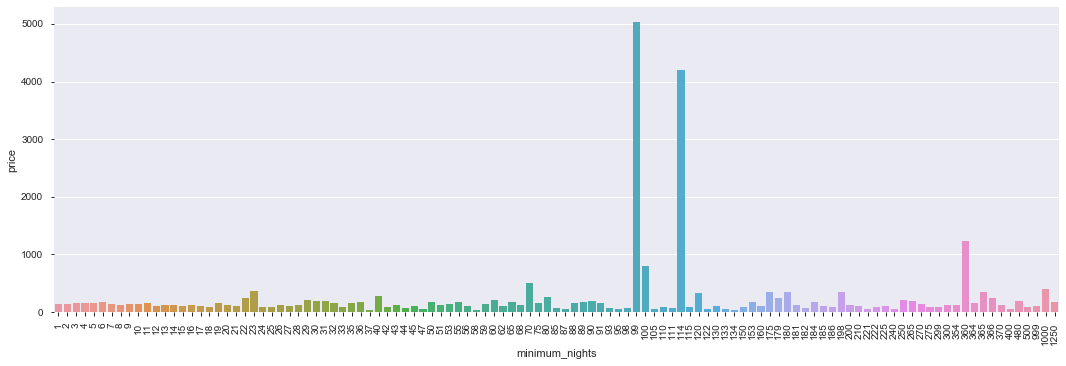

In [154]:
plt.figure(figsize=(20,15))
ax=sns.catplot(x="minimum_nights", y="price", kind="bar", data=sub, ci=None,height=5, aspect=3)
ax.set_xticklabels(rotation=90)

### Minimum Nights
We see that two rental units with 99 or 114 minimum nights stay requirement had a price of >$4000. Assuming most renters were staying for a short period of time from 1 day to months, these two points could be the total cost of renting a certain property type.

<Figure size 1440x1080 with 0 Axes>

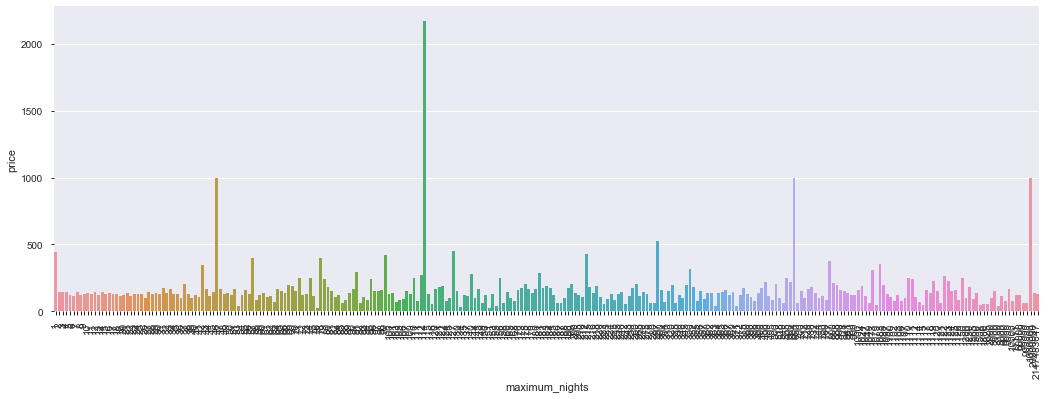

In [150]:
plt.figure(figsize=(20,15))
ax=sns.catplot(x="maximum_nights", y="price", kind="bar", data=sub, ci=None,height=5, aspect=3)
ax.set_xticklabels(rotation=90)

### Maximum Nights
Simialr to the minimum nights stay, some of the maximum nights data points had $1000 to over $2000 rental price that that could either be the total cost of renting the unit upto the maximum days or they were pricing for a long term stay.

<Figure size 1440x1080 with 0 Axes>

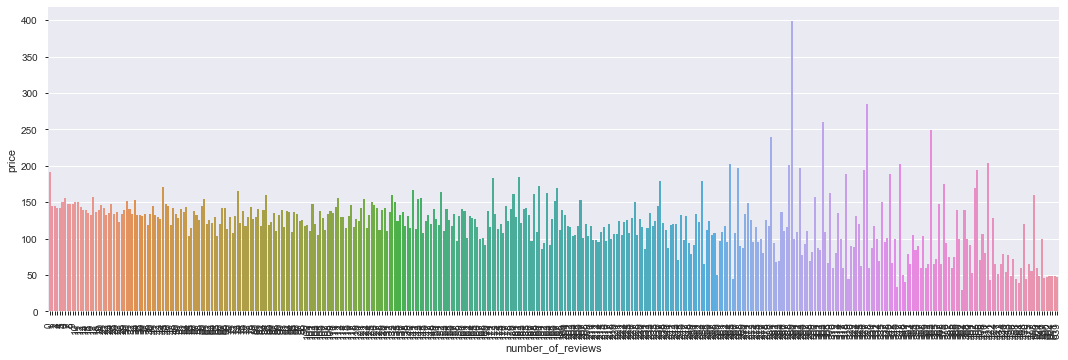

In [143]:
plt.figure(figsize=(20,15))
ax=sns.catplot(x="number_of_reviews", y="price", kind="bar", data=sub , ci=None,height=5, aspect=3)
ax.set_xticklabels(rotation=90)



<Figure size 1440x1080 with 0 Axes>

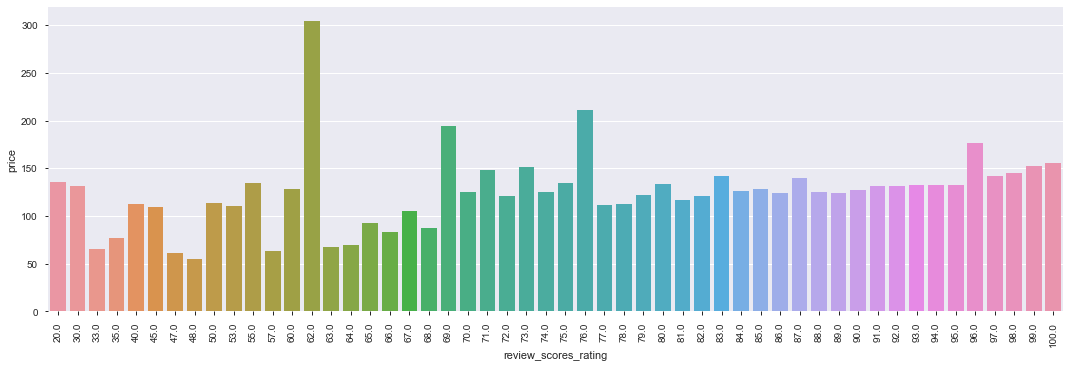

In [147]:
plt.figure(figsize=(20,15))
ax=sns.catplot(x="review_scores_rating", y="price", kind="bar", data=sub , ci=None,height=5, aspect=3)
ax.set_xticklabels(rotation=90)

### Review Rating Score vs Price
Rating Score between 80 to 100 were associated primarily with the rental units between >$100 to <$200. There was a low score of 62 that was associated with a rental price of $300 and this needs to be examine to reference the property type and location to see if we could perhaps isolate the point.